# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#SET UP URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = base_url + "&appid=" + api_key + "&q="

In [5]:
#SET UP LISTS FOR DF
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f'Processing Record {record} | {city}')
        record = record + 1
    except KeyError:
        print(f'City not found. Skipping...')
    time.sleep(1)


Beginning Data Retrieval
-----------------------------
Processing Record 1 | touros
Processing Record 2 | dikson
City not found. Skipping...
Processing Record 3 | vallenar
Processing Record 4 | qaanaaq
Processing Record 5 | tautira
Processing Record 6 | yellowknife
Processing Record 7 | airai
Processing Record 8 | tiksi
Processing Record 9 | rikitea
City not found. Skipping...
Processing Record 10 | chiredzi
Processing Record 11 | east london
City not found. Skipping...
Processing Record 12 | san patricio
Processing Record 13 | hobart
Processing Record 14 | vinkovci
Processing Record 15 | saint-philippe
Processing Record 16 | kapaa
Processing Record 17 | ocos
Processing Record 18 | cabo san lucas
Processing Record 19 | lagoa
Processing Record 20 | pijijiapan
Processing Record 21 | bani walid
City not found. Skipping...
Processing Record 22 | chuy
Processing Record 23 | hilo
Processing Record 24 | bluff
Processing Record 25 | khandyga
Processing Record 26 | okrika
City not found. Skippi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_data = pd.DataFrame({"City": city_name,
                         "Cloudiness": cloudiness,
                         "Country": country, 
                         "Date": date,
                         "Humidity": humidity,
                         "Lat": lat,
                         "Lng": lng,
                         "Max Temp": max_temp,
                         "Wind Speed": wind_speed})

city_data.to_csv("city_data.csv")

city_data.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [11]:
city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Touros,40,BR,1570913246,78,-5.20,-35.46,77.00,17.22
1,Dikson,100,RU,1570913055,98,73.51,80.55,30.63,25.20
2,Vallenar,100,CL,1570913250,54,-28.58,-70.76,63.57,8.62
3,Qaanaaq,89,GL,1570913137,68,77.48,-69.36,19.47,6.39
4,Tautira,20,PF,1570913253,57,-17.73,-149.15,78.80,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

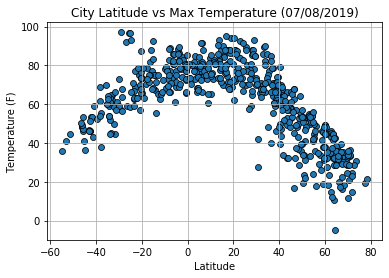

In [17]:
plt.scatter(city_data["Lat"], city_data["Max Temp"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Max Temperature (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

plt.savefig("LatitudeTemp.png")
plt.show()


#### Latitude vs. Humidity Plot

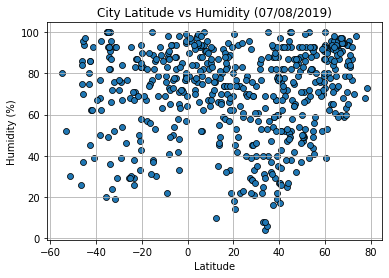

In [25]:
plt.scatter(city_data["Lat"], city_data["Humidity"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Humidity (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("LatitudeHumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

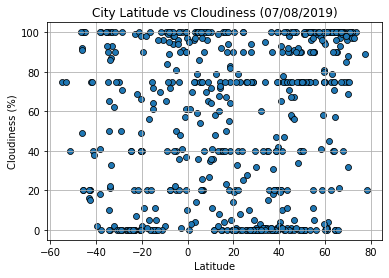

In [27]:
plt.scatter(city_data["Lat"], city_data["Cloudiness"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Cloudiness (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("LatitudeCloudiness.png")
plt.show()


#### Latitude vs. Wind Speed Plot

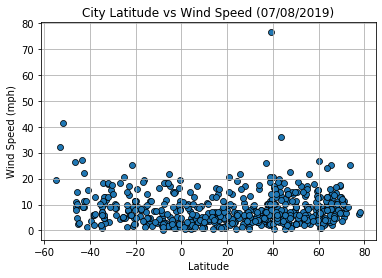

In [28]:
plt.scatter(city_data["Lat"], city_data["Wind Speed"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Wind Speed (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("LatitudeWind.png")
plt.show()